In [1]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#stream directy from github
import requests
import csv

#Get Continent name
import pycountry_convert as pc
import pycountry

from datetime import datetime

#Get coordinates
from geopy.geocoders import Nominatim

#For mapping
from shapely.geometry import Polygon

#Disable Warning in cell 6
pd.options.mode.chained_assignment = None

In [2]:
URL = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

with requests.Session() as s:
    download = s.get(URL)
    decoded_content = download.content.decode('utf-8')
    
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

In [3]:
df_new = pd.DataFrame(my_list, columns=my_list[0]).drop([0])
df_new.iloc[50:100,:]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
51,ABW,Aruba,2020-05-12,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
52,ABW,Aruba,2020-05-13,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
53,ABW,Aruba,2020-05-14,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
54,ABW,Aruba,2020-05-15,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
55,ABW,Aruba,2020-05-16,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
56,ABW,Aruba,2020-05-17,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
57,ABW,Aruba,2020-05-18,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
58,ABW,Aruba,2020-05-19,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
59,ABW,Aruba,2020-05-20,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,
60,ABW,Aruba,2020-05-21,101,0,3,0,945.994,0.0,28.099,...,13.085,7.452,35973.781,,,11.62,,,,


In [4]:
#Add continent column - this results in errors because country name differentiate
to_country_code = lambda row: pc.country_name_to_country_alpha2(row, cn_name_format="default")
try:
    country_code = new_df['location'].apply(to_country_code)
except:
    NameError

In [5]:
#Rename some countries to work

#Côte d'Ivoire
location_ivory_coast = df_new.location[df_new.location == "Cote d'Ivoire"]
df_new.location[df_new.location == "Cote d'Ivoire"] = location_ivory_coast.replace(to_replace = "Cote d'Ivoire",value="Côte d'Ivoire")

#Faroe Islands
location_faroe_islands = df_new.location[df_new.location == "Faeroe Islands"]
df_new.location[df_new.location == "Faeroe Islands"] = location_faroe_islands.replace(to_replace = "Faeroe Islands",value="Faroe Islands")

#Democratic Republic of the Congo
location_drc = df_new.location[df_new.location == "Democratic Republic of Congo"]
df_new.location[df_new.location == "Democratic Republic of Congo"] = location_drc.replace(to_replace = "Democratic Republic of Congo",value="Democratic Republic of the Congo")

#Curaçao
location_curacao = df_new.location[df_new.location == "Curacao"]
df_new.location[df_new.location == "Curacao"] = location_curacao.replace(to_replace = "Curacao",value="Curaçao")


#Reset Timor to Timor-Leste (proper name)
location_timor = df_new.location[df_new.location == "Timor"]
df_new.location[df_new.location == "Timor"] = location_timor.replace(to_replace = "Timor",value="Timor-Leste")

In [6]:
def create_continent():
    
    '''
    Input: None
    Output: Complete series with continent names
    '''
    #Initializes new Series
    conti_column = pd.Series([],dtype='object')

    continents = {
        'NA': 'North America',
        'SA': 'South America', 
        'AS': 'Asia',
        'OC': 'Australia',
        'AF': 'Africa',
        'EU': 'Europe'}
    
    #Checks which countries have problems using when converting from the 2 country
    #code to continent name, adds these countries to a set
    stuck_alpha2 = set()
    for row in df_new['location']:
        try:
            continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(row))]
        except:
            stuck_alpha2.add(row)

            
            
    
    #Fills in continent name for countries without converting problems and leaves the
    #others as np.nan
    for index,country in enumerate(df_new.location):
        if country in set(df_new.location[~df_new['location'].isin(list(stuck_alpha2))]):
            conti_column.loc[index] = continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))]
        else:
            conti_column.loc[index] = np.nan
            
    return conti_column

    #Manually add Continent names for the stuck_alpha2 countries


df_new['continent'] = create_continent()

In [7]:
#Here display the countries that return errors
continents = {
        'NA': 'North America',
        'SA': 'South America', 
        'AS': 'Asia',
        'OC': 'Australia',
        'AF': 'Africa',
        'EU': 'Europe'}

stuck_alpha2 = set()
for row in df_new['location']:
    try:
        continents[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(row))]
    except:
        stuck_alpha2.add(row)
stuck_alpha2

{'Bonaire Sint Eustatius and Saba',
 'International',
 'Kosovo',
 'Sint Maarten (Dutch part)',
 'Timor-Leste',
 'Vatican',
 'Western Sahara',
 'World'}

In [8]:
#lets change continent values of the stuck alpha2 rows
df_new['continent'][df_new.location == "Bonaire Sint Eustatius and Saba"] = "North America"
df_new['continent'][df_new.location == "Vatican"] = "Europe"
df_new['continent'][df_new.location == "Sint Maarten (Dutch part)"] = "North America"
df_new['continent'][df_new.location == "Timor-Leste"] = "Asia"
df_new['continent'][df_new.location == "Kosovo"] = "Europe"
df_new['continent'][df_new.location == "Western Sahara"] = "Africa"

In [9]:
def create_alpha2():
    alpha2_column = pd.Series(dtype='object')
    
    for index, alpha3 in enumerate(df_new.iso_code):
        try:
            alpha2_column.loc[index] = pc.country_alpha3_to_country_alpha2(alpha3)
        #The only country that appeared to have a error converting is Kosovo
        except:
            if alpha3 == 'RKS':
                alpha2_column.loc[index] = 'XK'
    
    return alpha2_column

df_new['alpha2'] = create_alpha2()

In [10]:
#Here the countries that have nan entries for continent name
continent_nan = df_new[(df_new['continent'].isna())
                & (df_new['location'] != 'World')
                & (df_new['location'] != 'International')]

'''for row in continent_nan.index:
    try:
        change_alpha = pc.country_name_to_country_alpha2(df_new.iloc[row].location)
        #change alpha2
        df_new.iloc[row].alpha2 = change_alpha
        #set continent name
        df_new.iloc[index].continent = pc.country_alpha2_to_continent_code(df_new.iloc[index].alpha2)
    except:
        print (df_new.iloc[row].location)'''

'for row in continent_nan.index:\n    try:\n        change_alpha = pc.country_name_to_country_alpha2(df_new.iloc[row].location)\n        #change alpha2\n        df_new.iloc[row].alpha2 = change_alpha\n        #set continent name\n        df_new.iloc[index].continent = pc.country_alpha2_to_continent_code(df_new.iloc[index].alpha2)\n    except:\n        print (df_new.iloc[row].location)'

In [11]:
#Check for nan Values
continent_nan.isna().sum().continent

7

In [12]:
#Get coordinates
def create_coordinates(column):
    
    geolocator = Nominatim(user_agent="Get_Coordinates")
    #Dict with country key and coordinates value
    #country_coordinates_dict = dict()
    country_latitude_dict = dict()
    country_longitude_dict = dict()
    
    for i in column.unique():
        try:
            loc = geolocator.geocode(i)
            #country_coordinates_dict[i] = [loc.latitude, loc.longitude]
            country_latitude_dict[i] = loc.latitude
            country_longitude_dict[i] = loc.longitude
        except:
            #"Swaziland" to "eSwatini"
            #"Sint Maarten (Dutch part)" to "Sint Maarten"
            if  i == "Sint Maarten (Dutch part)":
                loc_error1 = geolocator.geocode('Sint Maarten')
                #country_coordinates_dict[i] = (loc_error1.latitude, loc_error1.longitude)
                country_latitude_dict[i] = loc_error1.latitude
                country_longitude_dict[i] = loc_error1.longitude
            elif i == "Swaziland":
                loc_error2 = geolocator.geocode('eSwatini')
                #country_coordinates_dict[i] = (loc_error2.latitude, loc_error2.longitude)
                country_latitude_dict[i] = loc_error2.latitude
                country_longitude_dict[i] = loc_error2.longitude
    return country_latitude_dict, country_longitude_dict

In [13]:
#create new lat,long columns
df_new['latitude'] = df_new['location'].map(create_coordinates(df_new.location)[0])
df_new['longitude'] = df_new['location'].map(create_coordinates(df_new.location)[1])

In [14]:
#Use the preloaded world dataframe to get geodata for maps
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [15]:
#edit wrong columns
#france has -99 as its iso_a3 code
world.iso_a3[world.name == 'France'] = 'FRA'
world.iso_a3[world.name == 'Norway'] = 'NOR'

#set index of world and df_new dataframes
set_index_df = df_new.set_index('iso_code')
set_index_world = world.set_index('iso_a3')

#set new dataframe that joins both df's
df = set_index_world.join(set_index_df, lsuffix = '_other').reset_index()
df = df.drop(['index', 'pop_est', 'continent_other', 'name', 'gdp_md_est'],axis=1)

In [16]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16256 entries, 0 to 16255
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   geometry                         16256 non-null  geometry
 1   location                         16247 non-null  object  
 2   date                             16247 non-null  object  
 3   total_cases                      16247 non-null  object  
 4   new_cases                        16247 non-null  object  
 5   total_deaths                     16247 non-null  object  
 6   new_deaths                       16247 non-null  object  
 7   total_cases_per_million          16247 non-null  object  
 8   new_cases_per_million            16247 non-null  object  
 9   total_deaths_per_million         16247 non-null  object  
 10  new_deaths_per_million           16247 non-null  object  
 11  total_tests                      16247 non-null  object  
 

In [17]:
#make date variable of datetime attribute
df['date'] = pd.to_datetime(df.date,format = '%Y/%m/%d')

In [18]:
#convert columns to float
cols_to_int = ['total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_100k']
for i in cols_to_int:
    df[i] = pd.to_numeric(df[i],downcast='float')

In [19]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16256 entries, 0 to 16255
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   geometry                         16256 non-null  geometry      
 1   location                         16247 non-null  object        
 2   date                             16247 non-null  datetime64[ns]
 3   total_cases                      16247 non-null  float32       
 4   new_cases                        16247 non-null  float32       
 5   total_deaths                     16247 non-null  float32       
 6   new_deaths                       16247 non-null  float32       
 7   total_cases_per_million          16044 non-null  float32       
 8   new_cases_per_million            16044 non-null  float32       
 9   total_deaths_per_million         16044 non-null  float32       
 10  new_deaths_per_million           16044 non-null  f

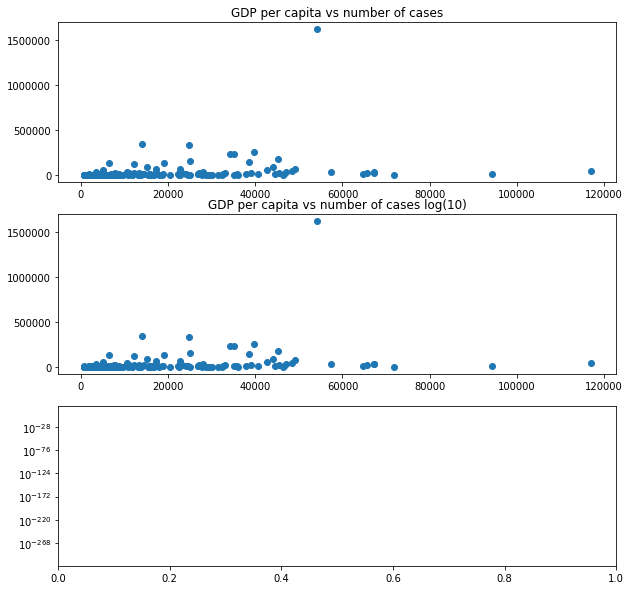

In [20]:
total_cases_country = df.groupby('location').total_cases.max()
country_gdp = df.groupby('location').gdp_per_capita.mean()

fig, arr_ax = plt.subplots(3, figsize=(10,10))

arr_ax[0].scatter(country_gdp,total_cases_country)
arr_ax[0].set_title("GDP per capita vs number of cases")
arr_ax[1].scatter(x=country_gdp,y=total_cases_country)
arr_ax[1].set_title("GDP per capita vs number of cases log(10)")
plt.yscale("log")

plt.show();

In [21]:
#create pandas series that matches country to continent  
continent_dict = dict()
for country in df.groupby('location'):
    continent_dict[country[0]] = country[1].continent.unique()[0]
country2continent = pd.Series(continent_dict)

#create pandas series that matches country to its population  
population_dict = dict()
for country in df.groupby('location'):
    population_dict[country[0]] = country[1].population.unique()[0]
country2population = pd.Series(population_dict)

#create pandas series that matches country to its population  
geo_dict = dict()
for country in df.groupby('location'):
    geo_dict[country[0]] = country[1].geometry.unique()[0]
country2geometry = geopandas.GeoSeries(geo_dict)

In [22]:
#create df to put all above data together
continent_df = pd.concat([total_cases_country,country_gdp],axis=1)
continent_df['continent'] = country2continent
continent_df['population'] = country2population
continent_df.head()

,total_cases,gdp_per_capita,continent,population
location,,,,
Afghanistan,9998.0,1803.987061,Asia,38928340.0
Albania,989.0,11803.430664,Europe,2877800.0
Algeria,8113.0,13913.838867,Africa,43851044.0
Angola,60.0,5819.495117,Africa,32866268.0
Argentina,11340.0,18933.906250,South America,45195776.0


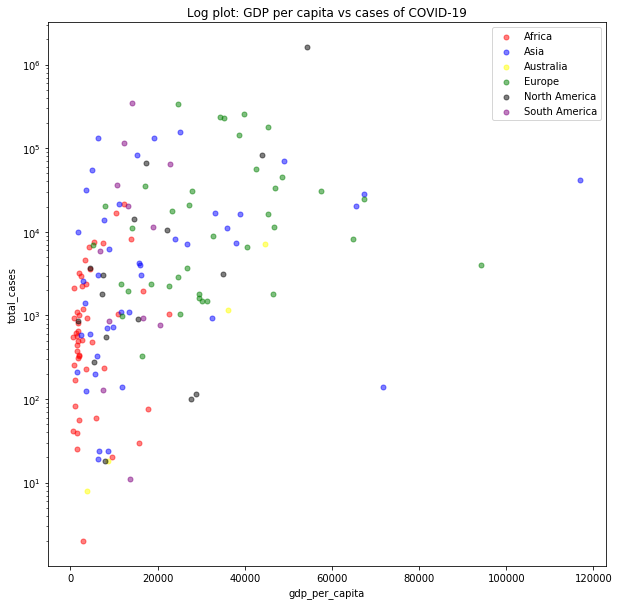

In [23]:
fig, ax = plt.subplots(figsize = (10,10))

#color of dots
color = {'Africa':'red',
         'Asia':'blue',
         'Europe':'green',
         'North America':'black',
         'Australia':'yellow',
         'South America':'purple'}

# plot scatter plot
grouped = continent_df.reset_index().groupby('continent')
for key, group in grouped:
    group.plot(ax=ax,
                kind='scatter',
                x='gdp_per_capita',
                y='total_cases',
                label=key,
                color=color[key],
                alpha = 0.5,
                s =25)
plt.yscale("log")

plt.title("Log plot: GDP per capita vs cases of COVID-19")
plt.legend()
plt.show()

In [24]:
#Above graph with population as dot size

In [25]:
#create geodataframe to make chloropleth map
total_cases_df = geopandas.GeoDataFrame(pd.concat([continent_df, country2geometry.rename('geometry')], axis=1))

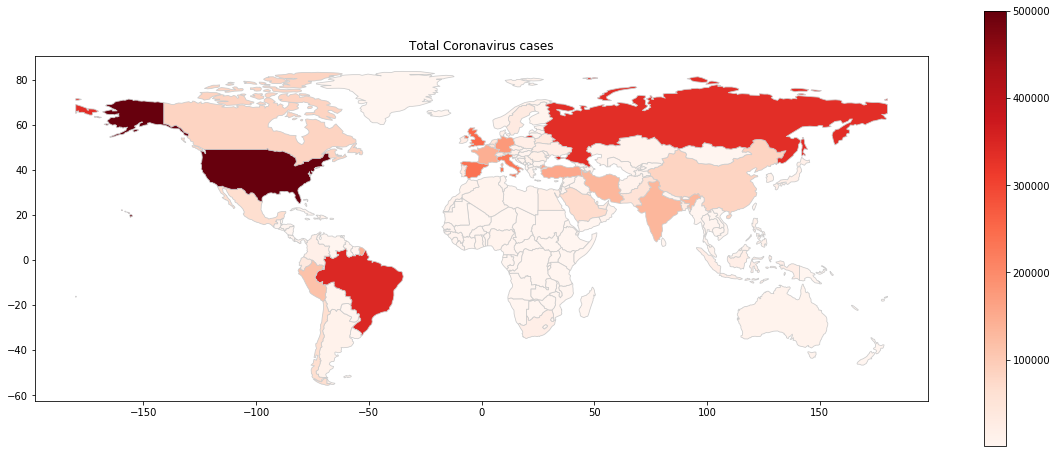

In [26]:
# set the range for the choropleth
vmin, vmax = 1000, 500000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

total_cases_df.plot(column='total_cases',
                    cmap='Reds',
                    linewidth=0.8,
                    ax=ax,
                    edgecolor='0.8',
                    vmin=vmin,
                    vmax=vmax)
ax.set_title("Total Coronavirus cases")

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show();

In [27]:
df

,geometry,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k,continent,alpha2,latitude,longitude
0,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"POLYGON ((48.94820 11.41062, 48.94820 11.41062...",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,597.028992,9.59,NaN,NaN,37.745998,0.5,Asia,AF,33.768006,66.238514
4,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,597.028992,9.59,NaN,NaN,37.745998,0.5,Asia,AF,33.768006,66.238514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16251,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2020-05-20,46.0,0.0,4.0,0.0,3.095,0.000,0.269,...,307.846008,1.82,1.6,30.700001,36.791000,1.7,Africa,ZW,-18.455496,29.746841
16252,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2020-05-21,48.0,2.0,4.0,0.0,3.230,0.135,0.269,...,307.846008,1.82,1.6,30.700001,36.791000,1.7,Africa,ZW,-18.455496,29.746841
16253,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2020-05-22,51.0,3.0,4.0,0.0,3.431,0.202,0.269,...,307.846008,1.82,1.6,30.700001,36.791000,1.7,Africa,ZW,-18.455496,29.746841
16254,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,2020-05-23,56.0,5.0,4.0,0.0,3.768,0.336,0.269,...,307.846008,1.82,1.6,30.700001,36.791000,1.7,Africa,ZW,-18.455496,29.746841


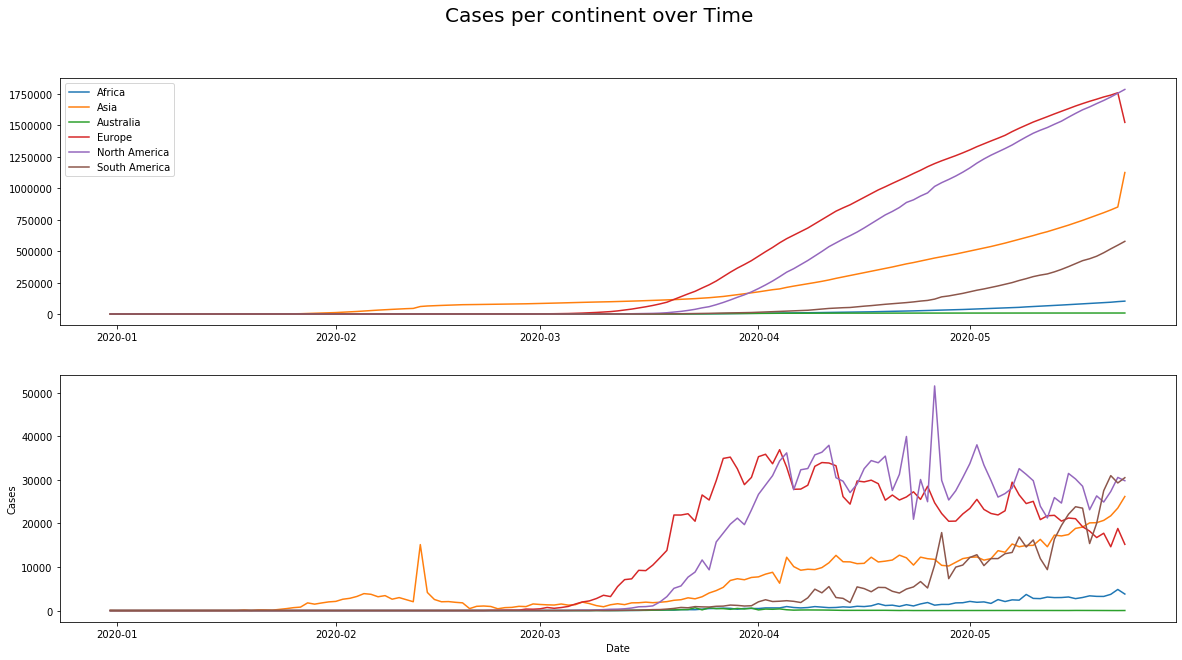

In [28]:
cont_date = df.groupby(['continent','date']).sum().reset_index()
today_date = cont_date[cont_date.date == pd.to_datetime(datetime.strftime(datetime.now(),format = '%Y-%m-%d'))].index

#updated dataframe without todays date included
cont_date = cont_date.drop(today_date)

fig, ax = plt.subplots(2, figsize=(20, 10))

for continent in cont_date.continent.unique():
    ax[0].plot(cont_date[cont_date.continent ==continent]['date'],
            cont_date[cont_date.continent ==continent]['total_cases'],label = continent)
    ax[1].plot(cont_date[cont_date.continent ==continent]['date'],
            cont_date[cont_date.continent ==continent]['new_cases'],label = continent)

fig.suptitle('Cases per continent over Time',fontsize=20)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Cases")
    
ax[0].legend()
plt.show()

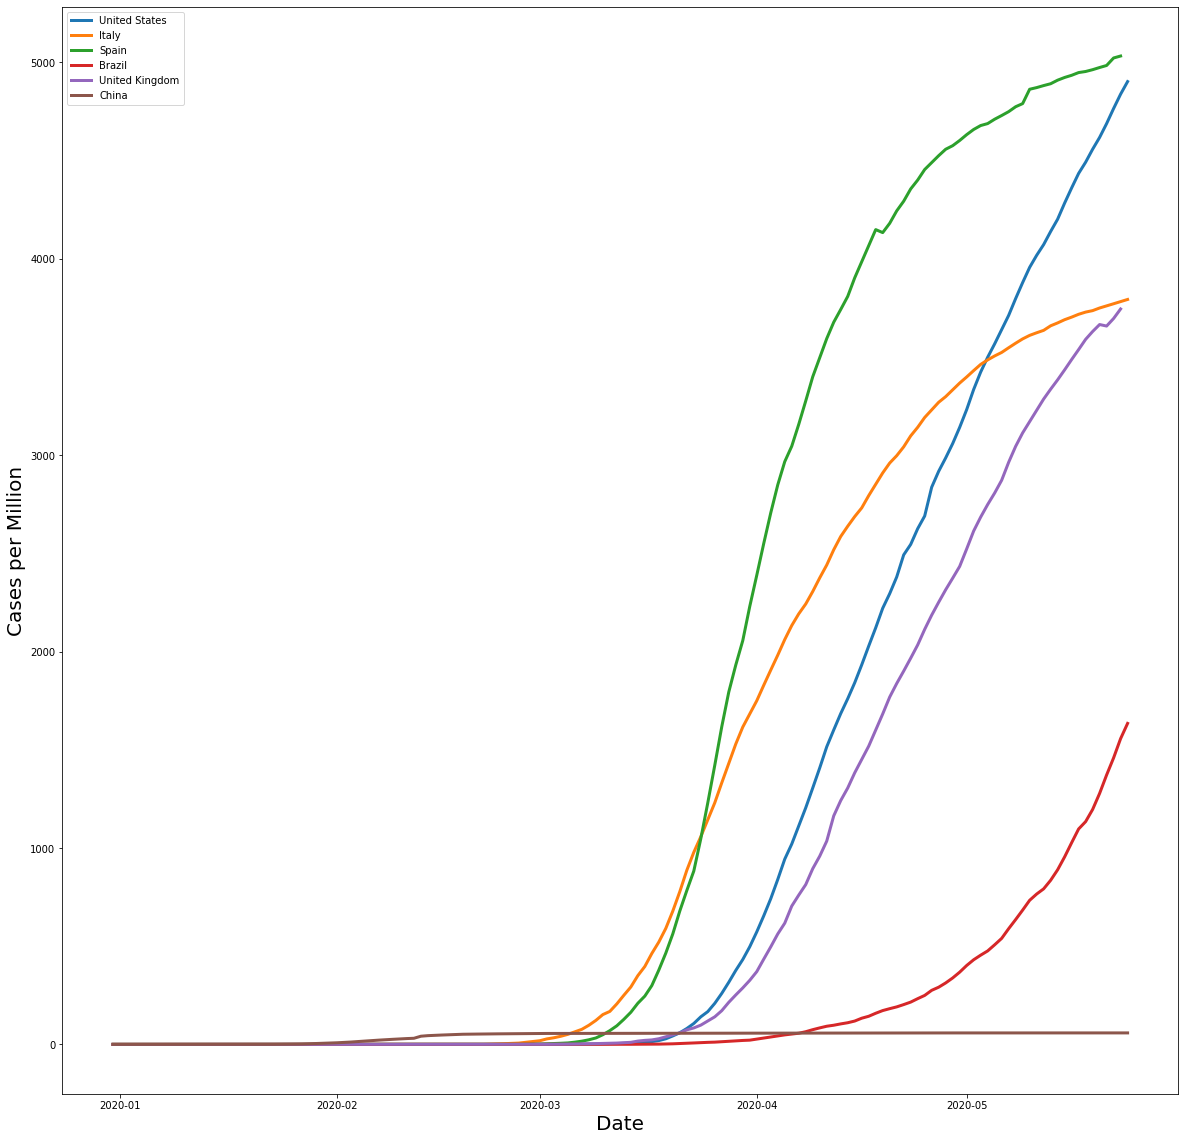

In [29]:
countries_to_plot = ['United States',
                     'Italy',
                     'Spain',
                     'Brazil',
                     'United Kingdom',
                     'China']

fig, ax = plt.subplots(1,figsize=(20,20))

for country in range(len(countries_to_plot)):
    plot_date = df['date'][df.location == countries_to_plot[country]]
    plot_cases = df['total_cases_per_million'][df.location == countries_to_plot[country]]
    plot_deaths = df['total_deaths_per_million'][df.location == countries_to_plot[country]]
    
    ax.plot(plot_date,plot_cases,
             label=countries_to_plot[country],
             linewidth=3)
    ax.set_ylabel('Cases per Million',fontsize=20)
    ax.set_xlabel('Date',fontsize=20)
    
    

ax.legend()
plt.show()

In [30]:
'''countries_to_plot = ['United States',
                     'Italy',
                     'Spain',
                     'Brazil',
                     'United Kingdom',
                     'China']

fig, ax = plt.subplots(1,figsize=(20,20))

for country in range(len(countries_to_plot)):    
    plot_date = df['date'][df.location == countries_to_plot[country]]
    plot_deaths = df['total_deaths_per_million'][df.location == countries_to_plot[country]]
    
    ax2=ax.twinx()
    ax2.plot(plot_date,plot_deaths,
             label=countries_to_plot[country],
             linewidth=3)
    #ax2.set_ylabel('Deaths per Million',fontsize=20)
    

plt.legend()
plt.show()'''

"countries_to_plot = ['United States',\n                     'Italy',\n                     'Spain',\n                     'Brazil',\n                     'United Kingdom',\n                     'China']\n\nfig, ax = plt.subplots(1,figsize=(20,20))\n\nfor country in range(len(countries_to_plot)):    \n    plot_date = df['date'][df.location == countries_to_plot[country]]\n    plot_deaths = df['total_deaths_per_million'][df.location == countries_to_plot[country]]\n    \n    ax2=ax.twinx()\n    ax2.plot(plot_date,plot_deaths,\n             label=countries_to_plot[country],\n             linewidth=3)\n    #ax2.set_ylabel('Deaths per Million',fontsize=20)\n    \n\nplt.legend()\nplt.show()"

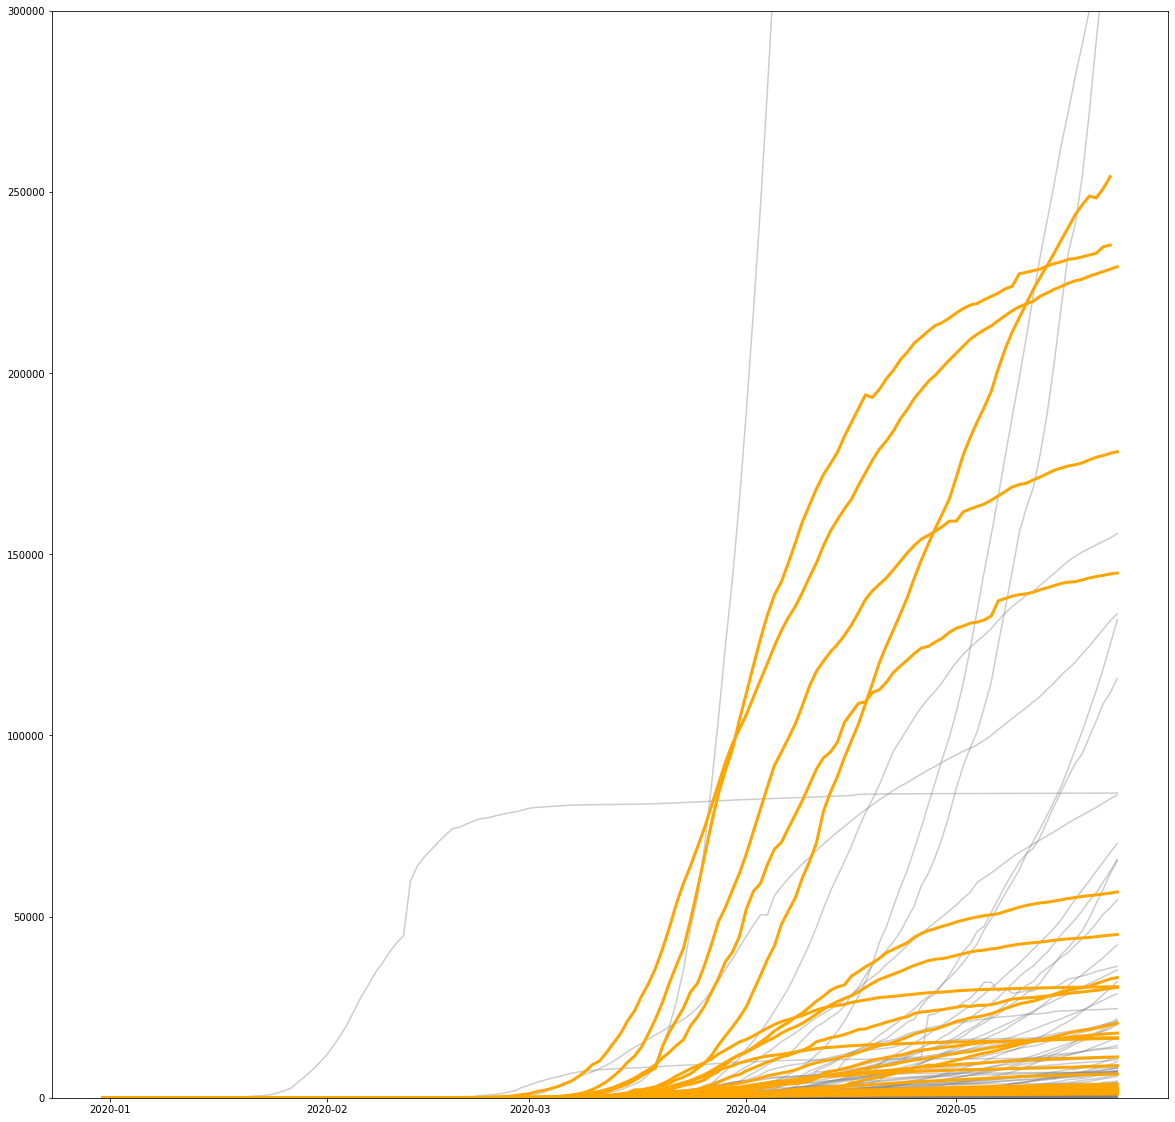

In [31]:
group_country = df.groupby(['date','location']).sum().reset_index()

#select 20 countries with the highest rate of people over 70
countries_top70 = df.groupby(['location','aged_70_older']).sum().reset_index()[['location','aged_70_older']].sort_values('aged_70_older',ascending=False)[0:25].location

fig, ax = plt.subplots(1, figsize=(20,20))

for country in group_country.location.unique():
    ax.plot(group_country['date'][group_country.location == country],
            group_country['total_cases'][group_country.location == country],
            c='grey',
            alpha=0.4)

    
for country in group_country.location.unique():
    if country in list(countries_top70):
        ax.plot(group_country['date'][group_country.location == country],
                group_country['total_cases'][group_country.location == country],
                c='orange',
                alpha=1,
                linewidth=3)
        
ax.set_ylim(0,300000)
plt.show()

In [32]:
df.groupby('location').mean()['hospital_beds_per_100k']

location
Afghanistan       0.50
Albania           2.89
Algeria           1.90
Angola             NaN
Argentina         5.00
                  ... 
Vietnam           2.60
Western Sahara     NaN
Yemen             0.70
Zambia            2.00
Zimbabwe          1.70
Name: hospital_beds_per_100k, Length: 168, dtype: float32

In [33]:
df.columns

Index(['geometry', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k',
       'continent', 'alpha2', 'latitude', 'longitude'],
      dtype='object')

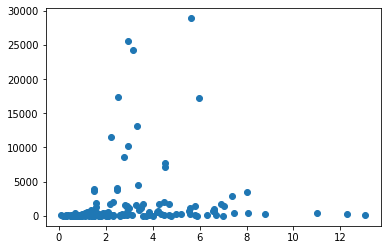

In [34]:
plt.scatter(df.groupby('location').mean()['hospital_beds_per_100k'], df.groupby('location').sum()['total_deaths_per_million'])
plt.show()

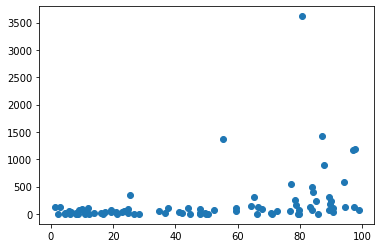

In [35]:
plt.scatter(df.groupby('location').mean()['handwashing_facilities'], df.groupby('location').sum()['total_deaths_per_million'])
plt.show()

In [36]:
df.columns

Index(['geometry', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k',
       'continent', 'alpha2', 'latitude', 'longitude'],
      dtype='object')

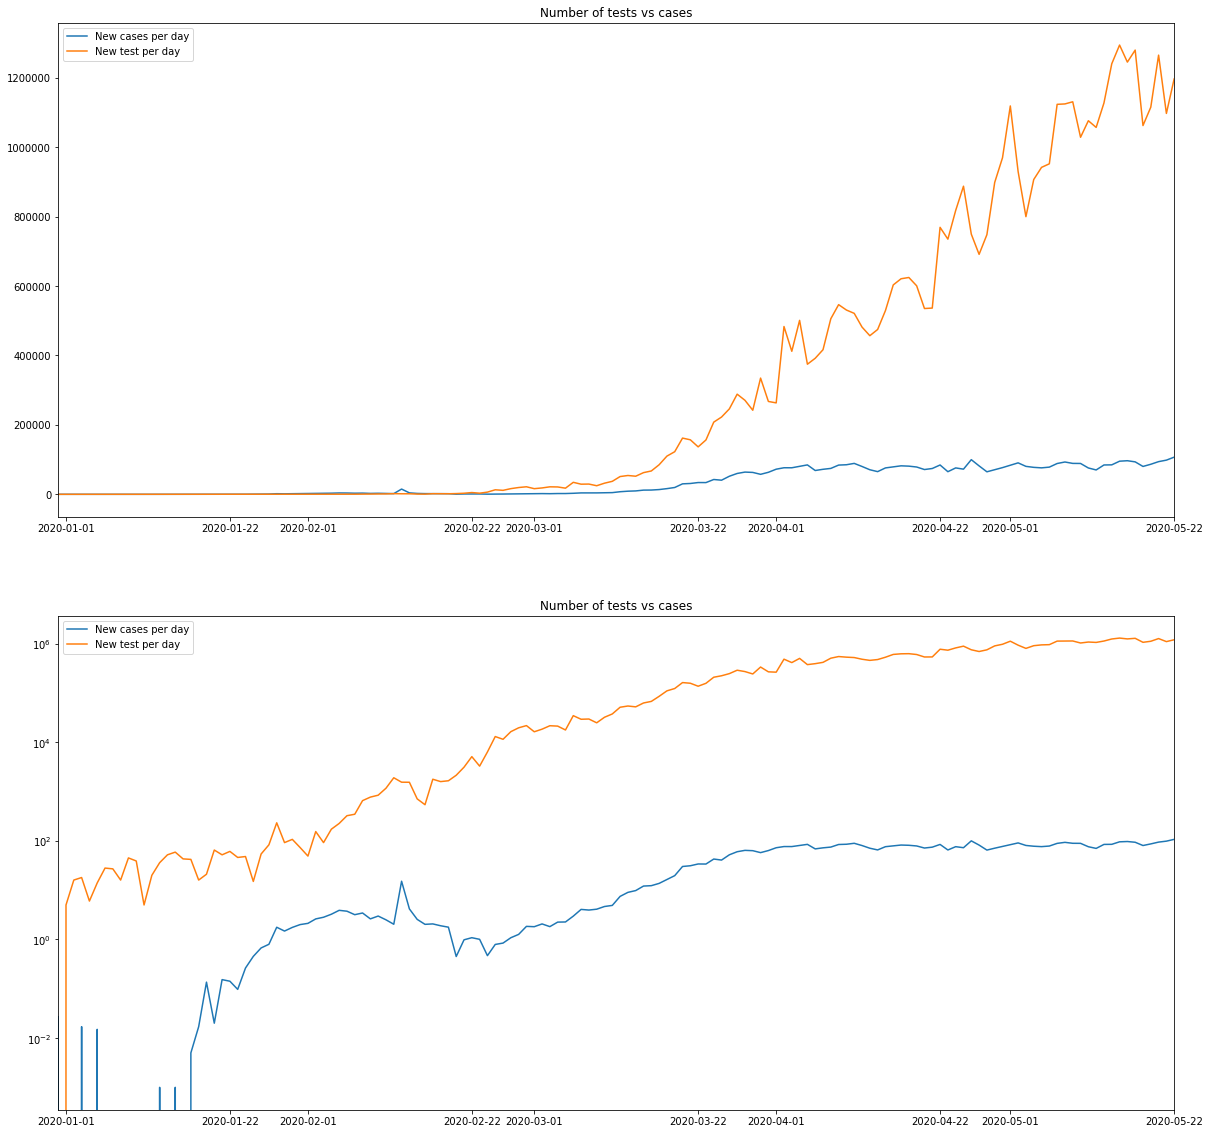

In [37]:
fig,ax = plt.subplots(2,figsize=(20,20))

groupby_today = df.groupby('date').sum()

#plot on ax one
ax[0].plot(groupby_today.index, groupby_today['new_cases'], label='New cases per day')
ax[0].plot(groupby_today.index, groupby_today['new_tests'], label='New test per day')
#plot on ax two
ax[1].plot(groupby_today.index, groupby_today['new_cases']*1/1000, label='New cases per day')
ax[1].plot(groupby_today.index, groupby_today['new_tests'], label='New test per day')


ax[0].set_xlim(groupby_today.index[0],groupby_today.index[-3])
ax[0].set_title("Number of tests vs cases")

ax[1].set_xlim(groupby_today.index[0],groupby_today.index[-3])
ax[1].set_title("Number of tests vs cases")

ax[0].legend()
ax[1].legend()

ax[1].set_yscale("log")
plt.show()

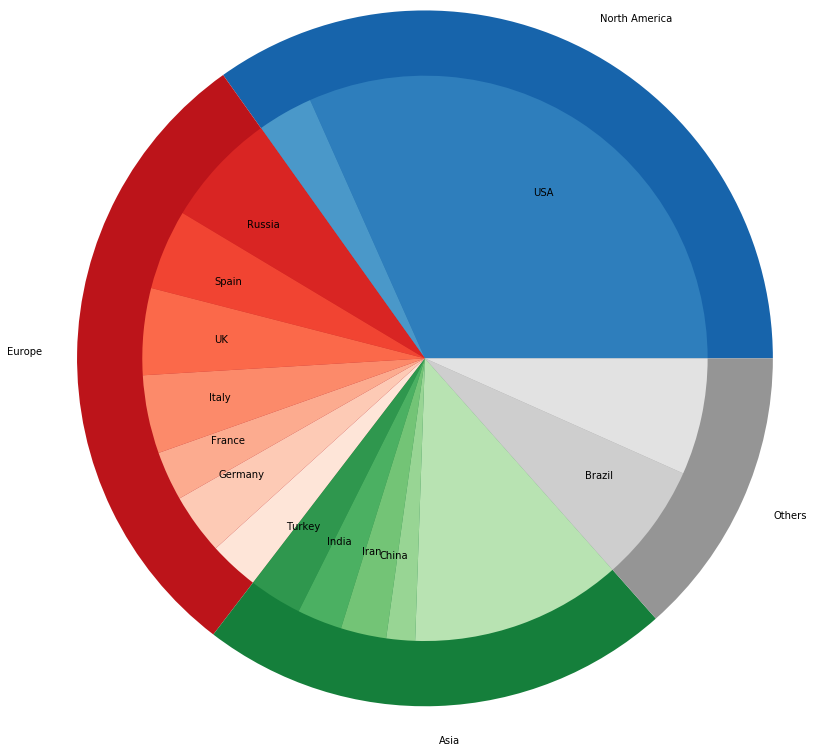

In [38]:
#https://python-graph-gallery.com/163-donut-plot-with-subgroups/
#create nested pie chart

group_continent = df.groupby(['date','continent']).sum().reset_index()
#main continent cases - using iloc here because ocasionally the most recent value is skew
namerica_total = group_continent.total_cases[group_continent.continent == 'North America'].iloc[-2]
europe_total = group_continent.total_cases[group_continent.continent == 'Europe'].iloc[-2]
asia_total = group_continent.total_cases[group_continent.continent == 'Asia'].iloc[-2]
#other cases
samerica_total = group_continent.total_cases[group_continent.continent == 'South America'].iloc[-2]
africa_total = group_continent.total_cases[group_continent.continent == 'Africa'].iloc[-2]
australia_total = group_continent.total_cases[group_continent.continent == 'Australia'].iloc[-2]

#plot certain countries
us_total = max(df[(df.location == "United States")].total_cases)

russia_total = max(df[(df.location == "Russia")].total_cases)
spain_total = max(df[(df.location == "Spain")].total_cases)
uk_total = max(df[(df.location == "United Kingdom")].total_cases)
italy_total = max(df[(df.location == "Italy")].total_cases)
france_total = max(df[(df.location == "France")].total_cases)
germany_total = max(df[(df.location == "Germany")].total_cases)

turkey_total = max(df[(df.location == "Turkey")].total_cases)
india_total = max(df[(df.location == "India")].total_cases)
iran_total = max(df[(df.location == "Iran")].total_cases)
china_total = max(df[(df.location == "China")].total_cases)

brazil_total = max(df[(df.location == "Brazil")].total_cases)


#set for pie chart
group_names = ['North America','Europe','Asia','Others']
group_size = [namerica_total, europe_total, asia_total, samerica_total+africa_total+australia_total]
subgroup_names = ["USA", "",
                  "Russia", "Spain", "UK", "Italy", "France", "Germany", "",
                  "Turkey", "India", "Iran", "China", "",
                  "Brazil", ""]
subgroup_size = [us_total, namerica_total-us_total, 
                  russia_total, spain_total, uk_total, italy_total, france_total, germany_total, europe_total-spain_total-uk_total-russia_total-italy_total-france_total-germany_total, 
                  turkey_total, india_total, iran_total, china_total, asia_total-india_total-turkey_total-iran_total-china_total, 
                  brazil_total, samerica_total+africa_total+australia_total - brazil_total]

# Create colors
a, b, c, d = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.6, labels=group_names, colors=[a(0.8), b(0.8), c(0.8), d(0.5)] )
#plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size,
                   radius=1.6-0.3,
                   labels=subgroup_names,
                   labeldistance=0.7,
                   colors=[a(0.7), a(0.6), b(0.7), b(0.6), b(0.5), b(0.4), b(0.3), b(0.2), b(0.1), c(0.7), c(0.6), c(0.5), c(0.4), c(0.3), d(0.3), d(0.2)])
#plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)


In [39]:
#check where the nan values are
df.groupby('location').mean().isna().mean()

total_cases                 0.000000
new_cases                   0.000000
total_deaths                0.000000
new_deaths                  0.000000
total_cases_per_million     0.000000
new_cases_per_million       0.000000
total_deaths_per_million    0.000000
new_deaths_per_million      0.000000
total_tests                 0.517857
new_tests                   0.565476
total_tests_per_thousand    0.517857
new_tests_per_thousand      0.565476
population                  0.000000
population_density          0.029762
median_age                  0.011905
aged_65_older               0.029762
aged_70_older               0.017857
gdp_per_capita              0.047619
extreme_poverty             0.315476
cvd_death_rate              0.017857
diabetes_prevalence         0.023810
female_smokers              0.226190
male_smokers                0.238095
handwashing_facilities      0.488095
hospital_beds_per_100k      0.130952
latitude                    0.000000
longitude                   0.000000
d

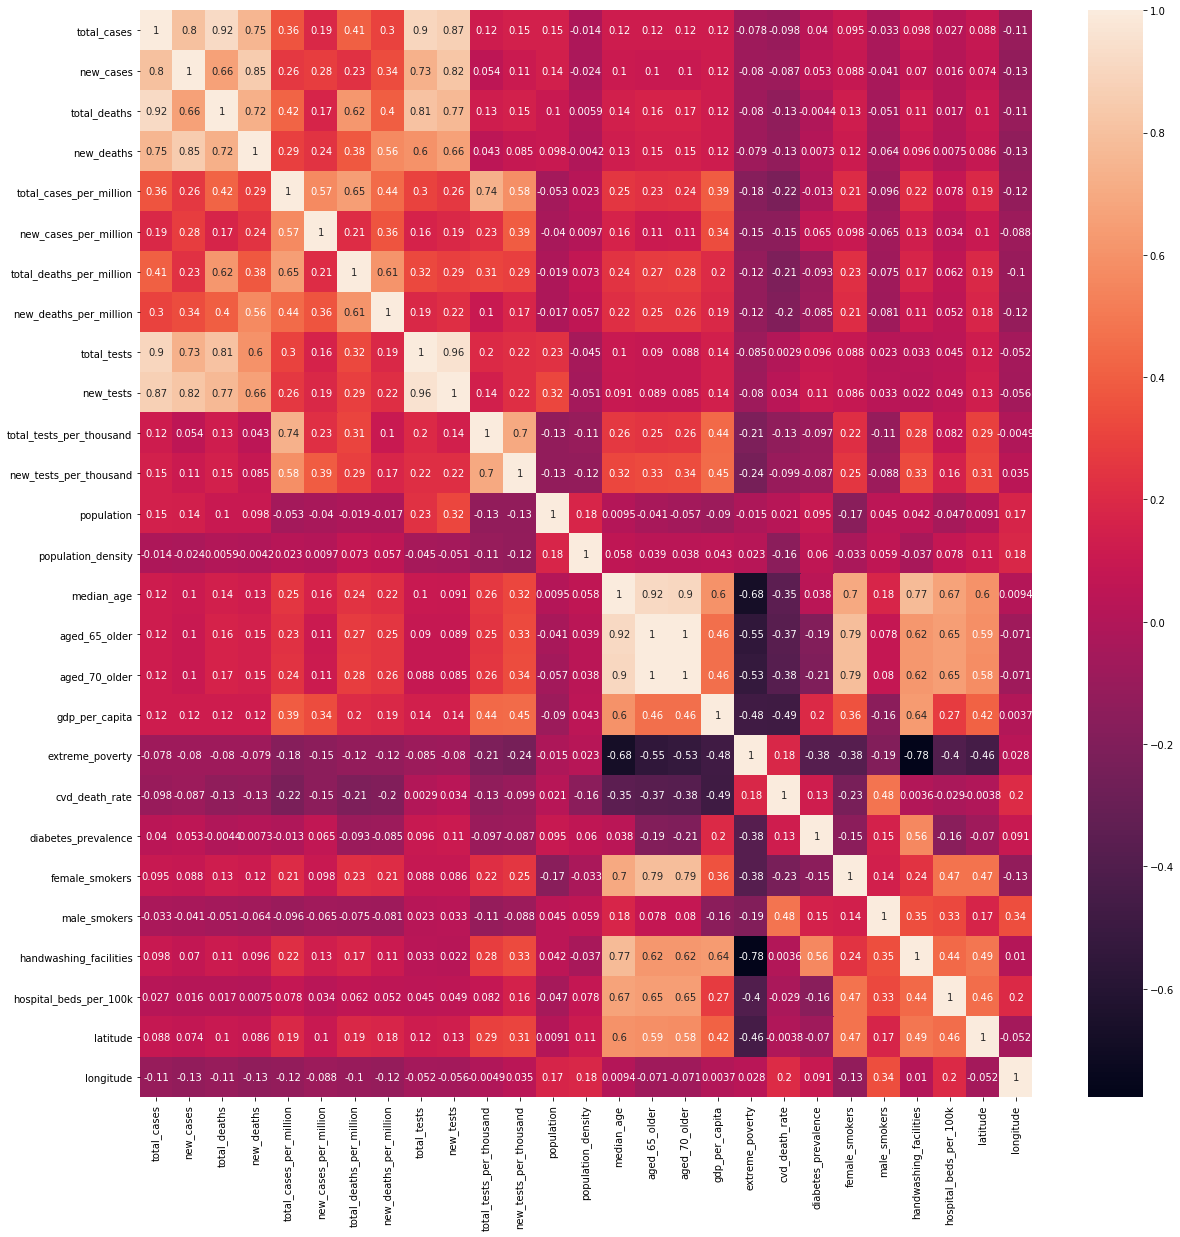

In [40]:
#create heatmap to show correlations

plt.figure(figsize=(20,20))

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [41]:
#make train/test data
#make list and randomly add to list for training data

In [42]:
from sklearn.linear_model import LinearRegression


X = df.groupby('location').mean()[['hospital_beds_per_100k', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence']]
y = df.groupby('location').sum()['total_cases']

reg = LinearRegression().fit(X,y)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
df.groupby('location').mean()

Wont include handwashing facilities, and male/female smokers.

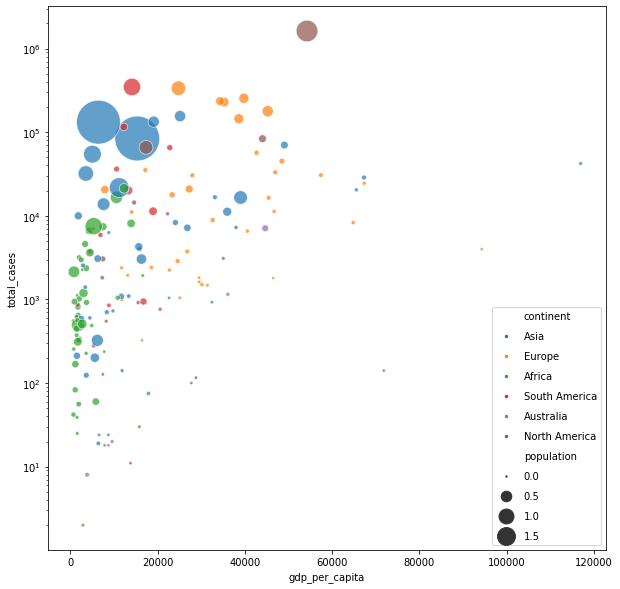

In [50]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=continent_df,
                       x='gdp_per_capita',
                       y='total_cases',
                       size='population',
                       sizes=(10, 2000),
                       hue='continent',
                       alpha=0.7
                           )
plt.legend(loc='lower right',markerscale=0.4,labelspacing=1)
plt.yscale("log")
plt.show()

Now lets animate the plot by time

In [ ]:
"""#import matplotlib animate module
plt.rcParams["animation.html"] = "jshtml"
%matplotlib inline 
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots(figsize=(10,10))

#FuncAnimation(fig, func, frames=None, init_func=None,
    #fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)

#first recorded date
day = df['date'][df['date'].notnull()].unique()
counter = 0
  

setx, sety = [],[]

#plot
scatter = sns.scatterplot(
                    x=setx,
                    y=sety,
                    size=30,
                    #sizes=(10, 2000),
                    #hue='continent',
                    alpha=0.7,
                    ax=ax)
plt.xlim(0,100000)
plt.ylim(0,100000)

def animate(i):
    global counter
    #select wanted data, given the date we have
    gdp_per_capita = df.groupby(['date','location','continent']).mean().loc[day[counter]]['gdp_per_capita']
    total_cases = df.groupby(['date','location','continent']).sum().loc[day[counter]]['total_cases']
    population = df.groupby(['date','location','continent']).mean().loc[day[counter]]['population']
    #add continents data
    #df.groupby(['date','location','continent']).mean().loc[day_counter]['gdp_per_capita']
    
    #append new data to 
    setx.append(gdp_per_capita)
    sety.append(total_cases)
    
    #continue to next day
    #day_counter = day_counter + np.timedelta64(1,'D')
    counter+=1
    
    return scatter

#create dataframe
animation = FuncAnimation(fig,
                          func=animate,
                          frames = 100,
                          interval=100)"""

In [ ]:
"""#import matplotlib animate module
plt.rcParams["animation.html"] = "jshtml"
%matplotlib inline 
from matplotlib.animation import FuncAnimation

#fig,ax = plt.subplots(figsize=(10,10))

#FuncAnimation(fig, func, frames=None, init_func=None,
    #fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)

#first recorded date
day = df['date'][df['date'].notnull()].unique()
counter = 0
  

fig, ax = plt.subplots()
x, y = [],[]
sc = ax.scatter([],[])

#ax.set_xlim(0,100000)
#ax.set_ylim(0,100000)

def animate(i):
    global counter
    #select wanted data, given the date we have
    gdp_per_capita = df.groupby(['date','location','continent']).mean().loc[day[counter]]['gdp_per_capita']
    total_cases = df.groupby(['date','location','continent']).sum().loc[day[counter]]['total_cases']
    population = df.groupby(['date','location','continent']).mean().loc[day[counter]]['population']
    #add continents data
    #df.groupby(['date','location','continent']).mean().loc[day_counter]['gdp_per_capita']
    
    '''x.append(np.array(gdp_per_capita))
    y.append(np.array(total_cases))'''
    print (np.array(zip(gdp_per_capita,total_cases)))
    
    #append new data to 
    sc.set_offsets(list(zip(gdp_per_capita,total_cases)))
    return sc
    
    #continue to next day
    #day_counter = day_counter + np.timedelta64(1,'D')
    counter+=1
    #return scatter,

#create dataframe
animation = FuncAnimation(fig,
                          func=animate,
                          frames = len(df['date'][df['date'].notnull()].unique()),
                          interval=10)

plt.show()"""

In [134]:
#https://python-graph-gallery.com/340-scatterplot-animation/
import math
#from matplotlib.animation import ArtistAnimation

xlimit = math.ceil(max(continent_df['gdp_per_capita'])/10000)*10000
ylimit = math.ceil(max(continent_df['total_cases'])/1000000)*1000000

list_of_plots = []

date_by_week = df[df['date'].notnull()].set_index('date').resample("W").sum().reset_index()['date'].unique()[:-1]

for i in date_by_week:
    fig = plt.figure(figsize=(10,10))
    data = df.groupby(['date','location','continent']).mean().loc[i].reset_index()
    test = sns.scatterplot(data=data,
                    x='gdp_per_capita',
                    y='total_cases',
                    size='population',
                    sizes=(10, 2000),
                    hue='continent',
                    alpha=0.7
                           )
    plt.title("Week of: " + str(np.datetime64(i,'D')), fontsize=20)
    plt.xlabel("GDP per capita")
    plt.ylabel("Total Cases")
    
    plt.legend(loc='lower right',markerscale=0.5,labelspacing=1)
    plt.yscale("log")
    plt.xlim((0,xlimit))
    plt.ylim((1,ylimit))
    plt.grid()

    filename='/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/'+str(i)+'.png'
    plt.savefig(filename)
    plt.gca()
    plt.close()

#Use: convert -delay 80 *.png animated_chart.gif
#this creates a gif of the above plots

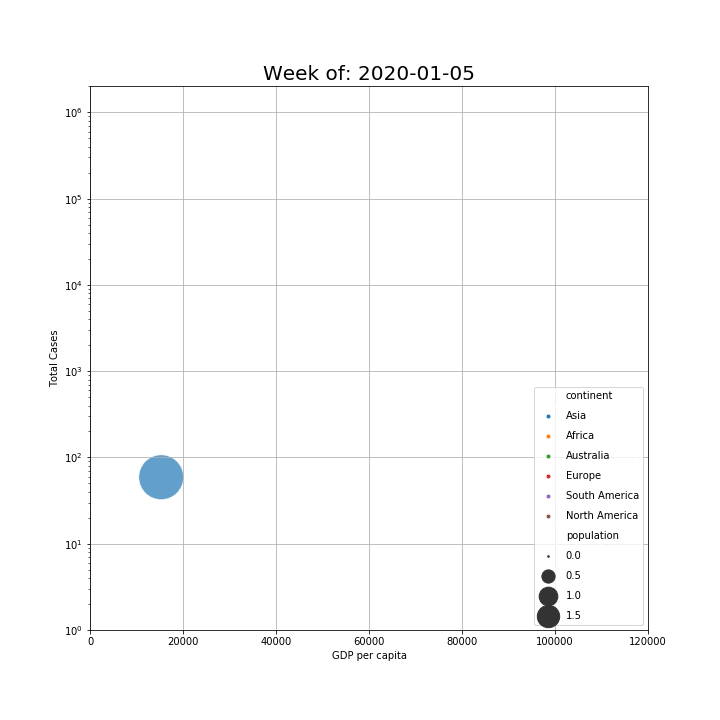

In [137]:
from IPython.display import Image
Image(filename="/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/animated_chart.gif")

In [144]:
#Create median age bins
to_sort = df.groupby('location').mean()['median_age']
bins = [0,20,30,40,50]

age_bins = pd.cut(to_sort,bins,labels = ['<20','20-30','30-40','40-50'])

In [145]:
#New age bin column
to_bin = lambda x: age_bins[x]
df['age_bins'] = df.location[df.location.notna()].apply(to_bin).astype(str)
df['age_bins'] = df['age_bins'].astype(str)

df['age_bins'].unique()

array(['nan', '<20', '30-40', '40-50', '20-30'], dtype=object)

In [146]:
df['age_bins'].value_counts()

30-40    4687
20-30    4460
40-50    4367
<20      2616
nan       126
Name: age_bins, dtype: int64

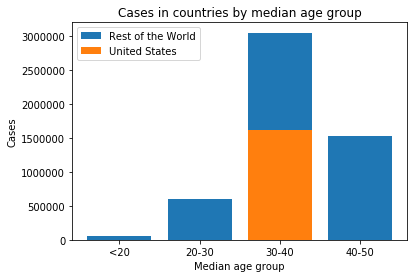

In [147]:
#make df that is first grouped by country and age group
country_age = df.groupby(['location','age_bins'])[['total_cases','total_deaths']].max().reset_index()
#set the order in which the bars should appear
cases_age = country_age.groupby('age_bins').sum().reindex(['<20', '20-30', '30-40','40-50']).reset_index()

#bars for the whole world
plt.bar(cases_age['age_bins'],
        cases_age['total_cases'],
        label='Rest of the World')

#bars for the US
plt.bar(country_age['age_bins'][(country_age['age_bins'] != 'nan') & (country_age['location'] == 'United States')],
        country_age['total_cases'][(country_age['age_bins'] != 'nan') & (country_age['location'] == 'United States')],
        label='United States')

plt.title("Cases in countries by median age group")
plt.xlabel('Median age group')
plt.ylabel('Cases')

plt.legend()
plt.show()

Now create whole new map

In [148]:
#function to return cartesian coordinates
#https://stackoverflow.com/questions/1185408/converting-from-longitude-latitude-to-cartesian-coordinates
def spherical_to_cartesian(lat,long):

    R = 1 #radius of the earth = 6367 km

    x = R * np.cos((lat)/180 *np.pi) * np.cos((long)/180 *np.pi)
    y = R * np.cos((lat)/180 *np.pi) * np.sin((long)/180 *np.pi)
    z = R *np.sin((lat)/180 *np.pi)

    return x,y,z

In [149]:
#create new x, y and z cartesian columns
df['x'] = spherical_to_cartesian(df['latitude'],df['longitude'])[0]
df['y'] = spherical_to_cartesian(df['latitude'],df['longitude'])[1]
df['z'] = spherical_to_cartesian(df['latitude'],df['longitude'])[2]

In [150]:
#groupby location and then resample by week - get new cases
country_cases_week = df.set_index('date').groupby(['location']).resample("M").sum().reset_index()[['date','new_cases']]

In [151]:
#groupby location and then resample by week - get cardinal
country_cardinal_week = df.set_index('date').groupby(['location']).resample("M").mean().reset_index()[['x','y','z']]

In [152]:
location_weighted_df = pd.concat([country_cases_week,country_cardinal_week],axis=1)

In [153]:
#Create weighted mean
def wm(x):
    try:
        return np.average(x, weights=location_weighted_df.loc[x.index, "new_cases"])
    except ZeroDivisionError:
        return 0 
    
weighted_df = location_weighted_df.groupby('date').agg(x_weighted_mean=("x", wm),
                                         y_weighted_mean=("y", wm),
                                         z_weighted_mean=("z", wm))

In [154]:
#function to return spherical coordinates
#https://stackoverflow.com/questions/1185408/converting-from-longitude-latitude-to-cartesian-coordinates
def cartesian_to_spherical(x,y,z):
    
    R = 1 #radius of the earth = 6367 km
    
    latitude = np.arcsin(z / R)
    longitude = np.arctan2(y, x)
    
    #convert from radians to degrees
    latitude = (latitude/np.pi)*180
    longitude = (longitude/np.pi)*180
    
    return latitude, longitude

In [155]:
weighted_df['latitude'] = cartesian_to_spherical(weighted_df['x_weighted_mean'],
                           weighted_df['y_weighted_mean'],
                           weighted_df['z_weighted_mean'])[0]
weighted_df['longitude'] = cartesian_to_spherical(weighted_df['x_weighted_mean'],
                           weighted_df['y_weighted_mean'],
                           weighted_df['z_weighted_mean'])[1]

In [156]:
#make data more versatile by adding new_cases
weighted_df = pd.concat([weighted_df,location_weighted_df.groupby('date').sum()],axis=1)

In [157]:
weighted_df

,x_weighted_mean,y_weighted_mean,z_weighted_mean,latitude,longitude,new_cases,x,y,z
date,,,,,,,,,
2019-12-31,-0.212011,0.791240,0.573577,35.000074,104.999927,27.0,19.298927,17.807320,32.329431
2020-01-31,-0.211398,0.788545,0.571955,34.886701,105.007304,9786.0,19.298927,17.807320,32.329431
2020-02-29,-0.205838,0.772299,0.575475,35.132875,104.923901,74567.0,22.109316,18.555840,33.897161
2020-03-31,0.420340,-0.078223,0.641314,39.889854,-10.541857,707975.0,69.778002,21.857911,53.722875
2020-04-30,0.250047,-0.237398,0.605398,37.257467,-43.513511,2316056.0,75.957123,23.532327,53.231812
2020-05-31,0.224705,-0.210379,0.447435,26.579206,-43.114069,2116703.0,76.979125,24.682826,53.362074


In [158]:
weighted_df.loc['2020-03-31'].longitude-10

-20.541857493433803

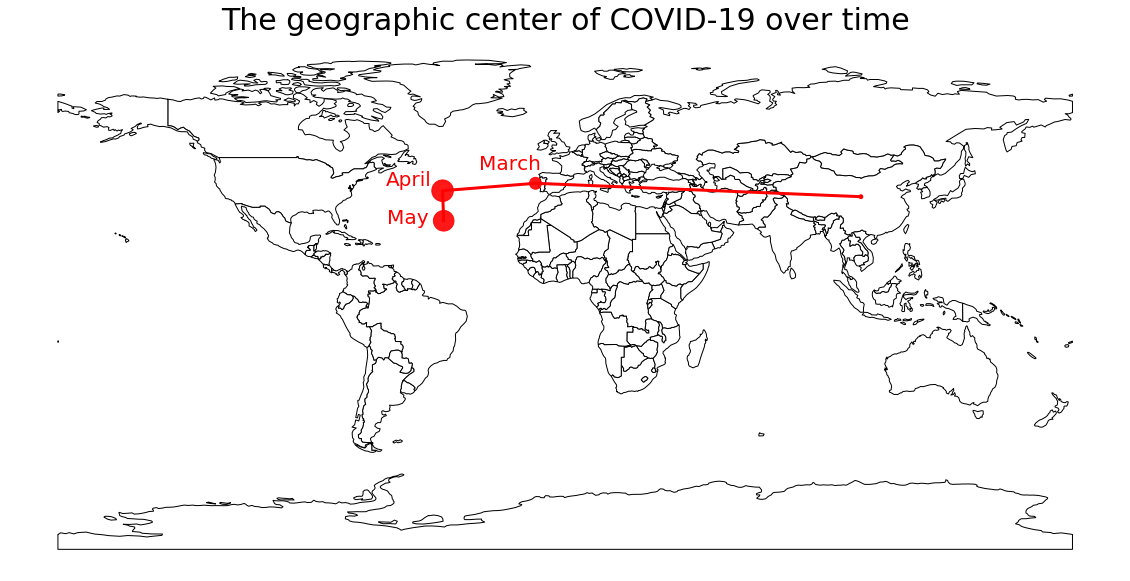

In [159]:
#plot movement of COVID-19 across the world
#https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html


#plot world
ax = world.plot(color='white', edgecolor='black', figsize = (20,20))

#plot data
plt.scatter(weighted_df.longitude,
            weighted_df.latitude,
            color='red',
            s=weighted_df.new_cases/5000,
            alpha =0.9)
plt.plot(weighted_df.longitude,
            weighted_df.latitude,
            color ='red',
            linewidth=3)

#plt.xlim(10,150)
#plt.ylim(-20,60)



plt.annotate("March",
             (weighted_df.loc['2020-03-31'].longitude, weighted_df.loc['2020-03-31'].latitude),
             (weighted_df.loc['2020-03-31'].longitude  - 20, weighted_df.loc['2020-03-31'].latitude + 5),
             fontsize=20,
             color='red')
plt.annotate("April",
             (weighted_df.loc['2020-04-30'].latitude,weighted_df.loc['2020-04-30'].latitude),
             (weighted_df.loc['2020-04-30'].longitude  - 20, weighted_df.loc['2020-04-30'].latitude + 2),
             fontsize=20,
             color='red')
plt.annotate("May",
             (weighted_df.loc['2020-05-31'].longitude,weighted_df.loc['2020-05-31'].latitude),
             (weighted_df.loc['2020-05-31'].longitude - 20,weighted_df.loc['2020-05-31'].latitude - 1),
             fontsize=20,
             color='red')

plt.title("The geographic center of COVID-19 over time", fontsize = 30)

plt.axis('off')
plt.show()

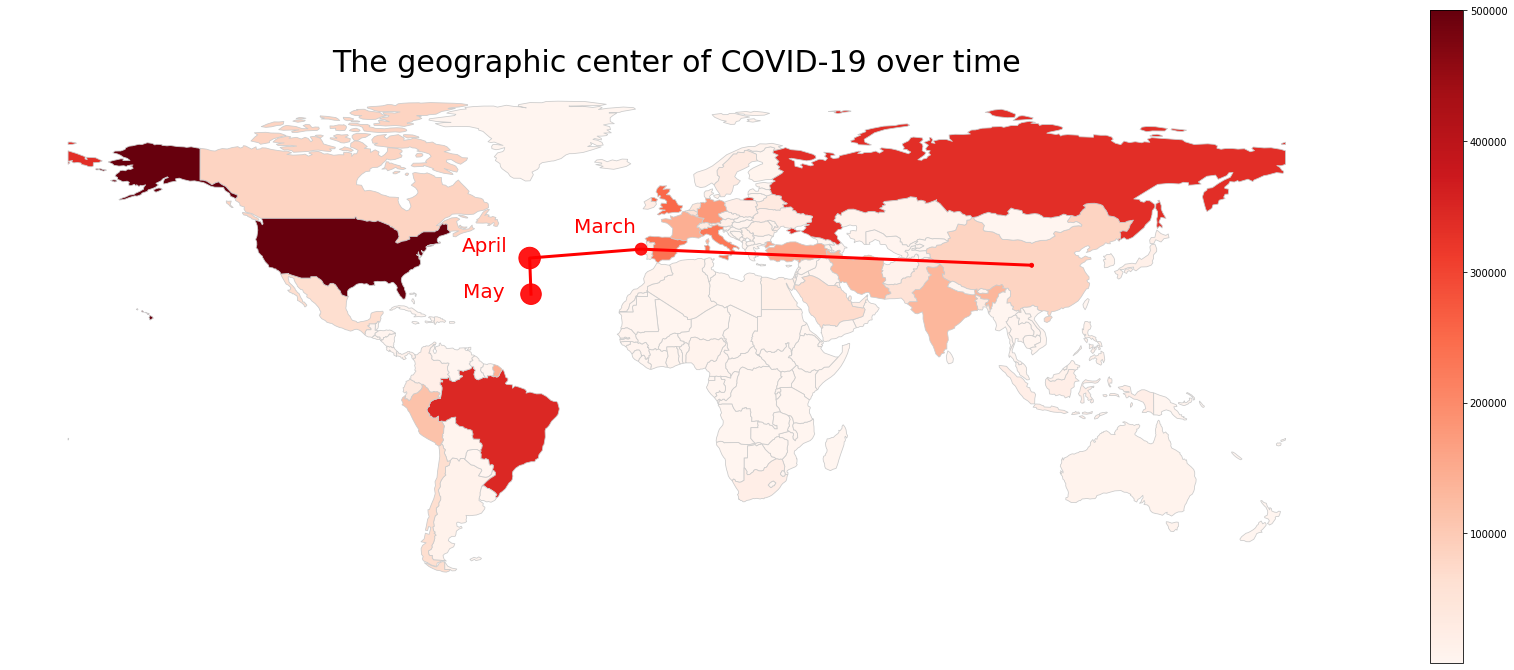

In [160]:
# set the range for the choropleth
vmin, vmax = 1000, 500000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 12))

total_cases_df.plot(column='total_cases',
                    cmap='Reds',
                    linewidth=0.8,
                    ax=ax,
                    edgecolor='0.8',
                    vmin=vmin,
                    vmax=vmax,figsize=(30,20))
ax.set_title("Total Coronavirus cases")

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


#plot data
plt.scatter(weighted_df.longitude,
            weighted_df.latitude,
            color='red',
            s=weighted_df.new_cases/5000,
            alpha =0.9)
plt.plot(weighted_df.longitude,
            weighted_df.latitude,
            color ='red',
            linewidth=3)
#annote the points
plt.annotate("March",
             (weighted_df.loc['2020-03-31'].longitude, weighted_df.loc['2020-03-31'].latitude),
             (weighted_df.loc['2020-03-31'].longitude  - 20, weighted_df.loc['2020-03-31'].latitude + 5),
             fontsize=20,
             color='red')
plt.annotate("April",
             (weighted_df.loc['2020-04-30'].latitude,weighted_df.loc['2020-04-30'].latitude),
             (weighted_df.loc['2020-04-30'].longitude  - 20, weighted_df.loc['2020-04-30'].latitude + 2),
             fontsize=20,
             color='red')
plt.annotate("May",
             (weighted_df.loc['2020-05-31'].longitude,weighted_df.loc['2020-05-31'].latitude),
             (weighted_df.loc['2020-05-31'].longitude - 20,weighted_df.loc['2020-05-31'].latitude - 1),
             fontsize=20,
             color='red')

plt.title("The geographic center of COVID-19 over time", fontsize = 30)

plt.axis('off')
plt.show();

In [ ]:
#Global cases
fig = plt.figure()
ax = plt.axes()

#ax.plot(x, np.sin(x));
#data
groupby_global = df.groupby('date').sum()
x = groupby_global.index
y = groupby_global.total_cases

#plot
ax.plot(x,y,c='r')
ax.bar(x,y)
ax.tick_params(axis='x',which='both',labelbottom=False)
ax.set_title('Global cases over time')
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

#save figure
plt.savefig('/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/global_cases.png')
plt.show();

In [ ]:
#Global cases vs deaths
fig, ax = plt.subplots(figsize = (15,5),nrows=1,ncols=2)

#data
groupby_global = df.groupby('date').sum()
x = groupby_global.index
y1 = groupby_global.total_cases
y2 = groupby_global.total_deaths

#plot
ax[0].plot(x,y1,c='purple',label='Cases')
ax[0].plot(x,y2,c='red',label='Deaths')
ax[0].tick_params(axis='x',which='both',labelbottom=False)
ax[0].set_title('Global cases over time')
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Cases")

ax[1].plot(x,y1,c='purple',label='Cases')
ax[1].plot(x,y2,c='red',label='Deaths')
ax[1].tick_params(axis='x',which='both',labelbottom=False)
ax[1].set_title('Global logarithimic cases over time,')
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Cases")
ax[1].set_yscale('log')

#save figure
ax[0].legend()
ax[1].legend()
plt.savefig('/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/global_cases_vs_deaths.png')
plt.show();

In [ ]:
groupby_global = df.groupby('date').sum()
groupby_global

In [ ]:
#Global cases vs tests

#data
groupby_global = df.groupby('date').sum()
x = groupby_global.new_tests
y = groupby_global.new_cases

plt.scatter(x,y)
plt.title("COVID-19 Cases vs number of Tests")
plt.xlabel("Tests")
plt.ylabel("Cases")

plt.savefig('/Users/sebastiangraff/Desktop/Data_Analysis/COVID19-Exploration/plot_images/global_tests_vs_cases.png')
plt.show();

In [ ]:
#Stacked plot by continents

#data
groupby_continent = df.groupby('continent').sum()
x=df.date
y=df.total_cases[df.continent ==]
 
# Basic stacked area chart.
plt.stackplot(x,y, labels=df.continent.unique())
plt.legend(loc='upper left')

In [ ]:
from collections import defaultdict

#Data
continent_dict=defaultdict(list)
for index, row in df.iterrows():
    continent_dict[row.continent].append(row.total_cases)

x=df.date
y1=continent_dict['North America']
y2=continent_dict['Asia']
y3=continent_dict['Africa']
y4=continent_dict['Europa']
y5=continent_dict['South America']
y6=continent_dict['Australia']
 
# Plot
plt.stackplot(continent_dict.keys(), y1,y2, labels=continent_dict.keys())
plt.legend(loc='upper left')
plt.show();

#np.array(d.keys(),dtype=float)